In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.shape

(5110, 12)

In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df['bmi']=imputer.fit_transform(df[['bmi']])

In [12]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df)
profile.to_file(output_file="stroke.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

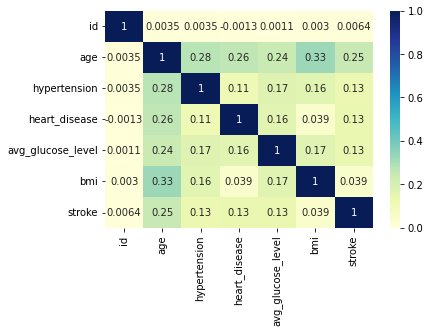

In [14]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [15]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [16]:
gender=pd.get_dummies(df[['gender']],drop_first=True)
gender.head()
print(df.gender.value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [17]:
df.columns
# df.head()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [18]:
married=pd.get_dummies(df[['ever_married']],drop_first=True)


print(df.ever_married.value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64


In [19]:
married.head()

,ever_married_Yes
0,1
1,1
2,1
3,1
4,1


In [20]:
residence=pd.get_dummies(df[['Residence_type']],drop_first=True)
residence.head()

,Residence_type_Urban
0,1
1,0
2,0
3,1
4,0


In [21]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [22]:
smoking=pd.get_dummies(df[['smoking_status']],drop_first=True)
smoking.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [23]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [24]:
working=pd.get_dummies(df[['work_type']],drop_first=True)
working.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [25]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [26]:
data=pd.concat([df,gender,married,working,residence,smoking],axis=1)

In [27]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,0,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0,1,0,0,1,0,0,0,1,0


In [28]:
cat_features=['gender',  'ever_married',
       'work_type', 'Residence_type','smoking_status']

In [29]:
data=data.drop(columns= cat_features,axis=1)

In [30]:
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [31]:
data.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Male                     5110 non-null   uint8  
 8   gender_Other                    5110 non-null   uint8  
 9   ever_married_Yes                5110 non-null   uint8  
 10  work_type_Never_worked          5110 non-null   uint8  
 11  work_type_Private               5110 non-null   uint8  
 12  work_type_Self-employed         51

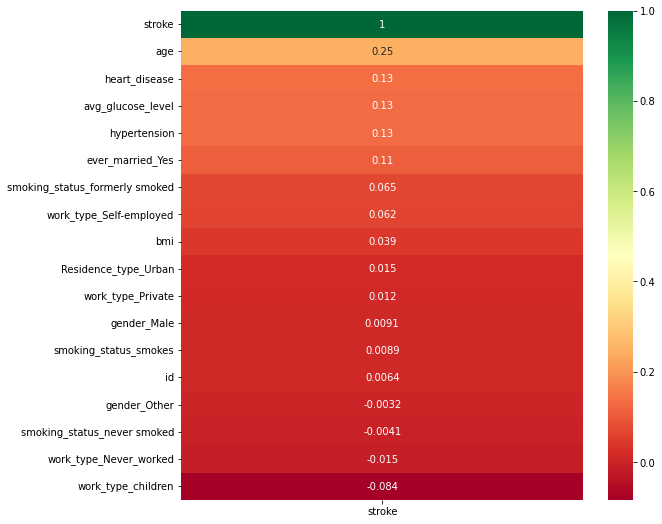

In [33]:
corr=data.corr()['stroke'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(9,9))
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

In [65]:
# splitting data
X=data.drop('stroke',axis=1)
X=data.drop('id',axis=1)
X.shape
X=X.drop('stroke',axis=1)
len(X.columns)


16

In [66]:
y=data[['stroke']]
y.shape

(5110, 1)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [70]:
X[0]

array([ 1.05143428, -0.32860186,  4.18503199,  2.70637544,  1.00123401,
        1.18998977, -0.01399046,  0.72388421, -0.06575636,  0.86429656,
       -0.43688053, -0.39411222,  0.98407974,  2.1849511 , -0.7667743 ,
       -0.42731326])

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(3832, 16)
(1278, 16)
(1278, 1)
(3832, 1)


In [73]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_classifier=DecisionTreeClassifier(random_state=1)
dec_tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [74]:
tree_predict=dec_tree_classifier.predict(X_test)
tree_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [75]:
dec_tree_classifier.score(X_test,y_test)

0.8967136150234741

In [76]:
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [77]:
data.shape

(5110, 18)

In [78]:
#randomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rand_classifier=RandomForestClassifier()
rand_classifier.fit(X_train,y_train)

C:\Users\ARJUN\AppData\Local\Temp/ipykernel_6988/2676960179.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_classifier.fit(X_train,y_train)


RandomForestClassifier()

In [79]:
rand_classifier.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
rand_classifier.score(X_test,y_test)

0.9374021909233177

In [81]:
X_test.shape

(1278, 16)

In [82]:
from sklearn.svm import SVC
machine=SVC()
machine.fit(X_train,y_train)

c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [83]:
machine.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
machine.score(X_test,y_test)

0.9374021909233177

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.predict(X_test)

c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
knn.score(X_test,y_test)

0.9342723004694836

In [87]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
lr.score(X_test,y_test)

c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9381846635367762

In [88]:
from sklearn.model_selection import GridSearchCV
params={'C':[.1,1,10,100,1000],
'gamma':[1,.1,.01,.001,.0001],
'kernel':['rbf'] }
gridcv=GridSearchCV(SVC(),params,verbose=3,refit=True)
gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.4s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.4s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.957 total time=   0.4s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.4s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.957 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.957 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.957 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.957 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.956 total time=   0.5s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.956 total time=   0.5s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.957 total time=   0.5s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.953 total time=   0.5s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.954 total time=   0.4s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.957 total time=   0.1s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.954 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.1s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.1s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.957 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.957 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.957 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.939 total time=   0.2s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.940 total time=   0.2s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.931 total time=   0.2s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.935 total time=   0.2s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.933 total time=   0.2s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.949 total time=   0.1s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.957 total time=   0.1s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.1s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.1s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.957 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.1s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.957 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.928 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.928 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.928 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.931 total time=   0.1s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.931 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.928 total time=   0.1s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.924 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.926 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.936 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.954 total time=   0.2s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.2s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.957 total time=   0.3s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.2s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.954 total time=   0.2s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.4s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.3s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.957 total time=   0.4s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.3s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.3s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.957 total time=   0.2s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.1s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.926 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.926 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.930 total time=   0.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.924 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.919 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.911 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.916 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.926 total time=   0.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.5s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.952 total time=   0.5s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.6s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.945 total time=   0.4s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.949 total time=   0.5s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.956 total time=   2.1s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.956 total time=   1.9s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.957 total time=   2.0s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.956 total time=   1.5s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.956 total time=   1.9s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.5s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.4s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.957 total time=   0.5s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.5s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.956 total time=   0.6s


c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [89]:
# we got best pramaters to improve the accuracy of the svm model
gridcv.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [90]:
from sklearn.svm import SVC
machine=SVC(C=.1,gamma=1,kernel='rbf')
machine.fit(X_train,y_train)

c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, gamma=1)

In [91]:
predict=machine.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
X_train

array([[ 0.7418427 ,  3.04319637, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [-0.0984773 , -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.38802376, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       ...,
       [-1.86049566, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       [ 1.62639008, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.12265954, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 ,  2.34020354]])

In [93]:
machine.score(X_test,y_test)

0.9374021909233177

In [94]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ARJUN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [99]:
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [98]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(machine,file)

In [96]:
X_test.shape

(1278, 16)

In [113]:
X_test[15]

array([-0.01002256, -0.32860186, -0.2389468 ,  0.82338869,  2.20945544,
        1.18998977, -0.01399046,  0.72388421, -0.06575636, -1.15701027,
        2.28895527, -0.39411222,  0.98407974, -0.45767615, -0.7667743 ,
       -0.42731326])

In [112]:
list( int(i[0]) for i in y_test.values).index(1)

15

In [116]:
machine.predict([[-0.01002256, -0.32860186, -0.2389468 ,  0.82338869,  2.20945544,
        1.18998977, -0.01399046,  0.72388421, -0.06575636, -1.15701027,
        2.28895527, -0.39411222,  0.98407974, -0.45767615, -0.7667743 ,
       -0.42731326]])

array([0], dtype=int64)